Import lib ---

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # SVR for Reggretion, SVC for Classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('../data/HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1459.000000,842.787043,0.0,729.5,1459.0,2188.5,2918.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [4]:
df.describe(include='O').T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
LotConfig,2919,5,Inside,2133
BldgType,2919,5,1Fam,2425
Exterior1st,2918,15,VinylSd,1025


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
df.shape

(2919, 13)

Data Preprocessing --

In [7]:
obj = []
int = []
float = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
    
    if df[i].dtype == 'int':
        int.append(i)
        
    if df[i].dtype == 'float':
        float.append(i)

    

print(f"catagorical Variable :- {len(obj)} those are {obj}")
print(f"integer Variable :- {len(int)} those are {int}")
print(f"float Variable :- {len(float)} those are {float}")

catagorical Variable :- 4 those are ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
integer Variable :- 6 those are ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
float Variable :- 3 those are ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


EDA --

<Axes: >

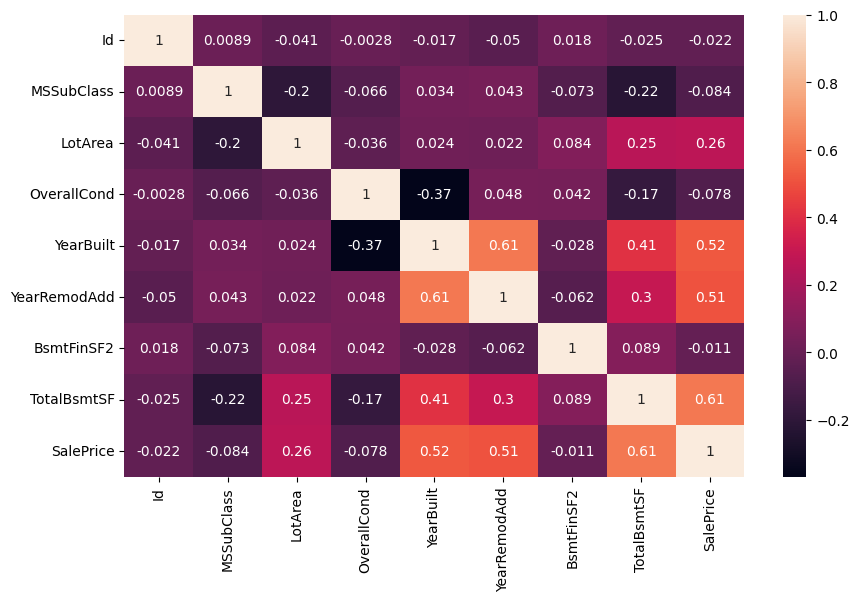

In [8]:
# Heatmap for corr
num = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(num.corr(),annot=True)

<Axes: >

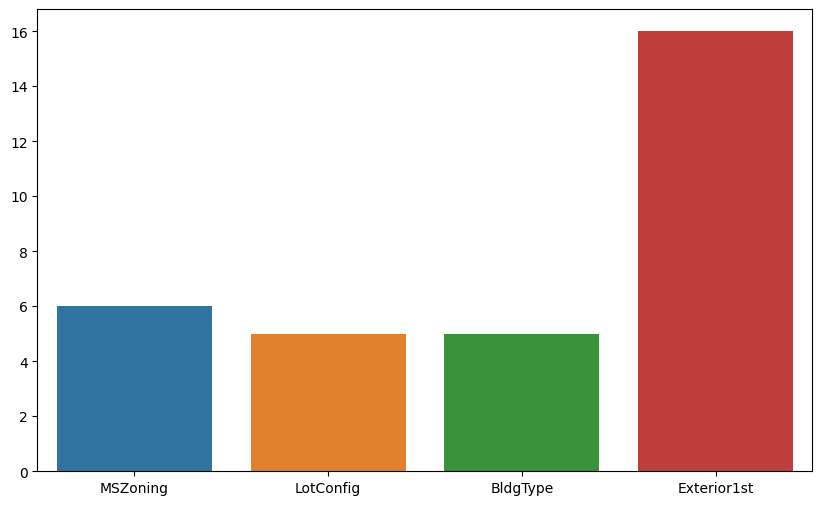

In [9]:
unq = []
for i in df.columns:
    if df[i].dtype == "object":
        unq.append(df[i].unique().size)
plt.figure(figsize=(10,6))
sns.barplot(x=obj,y=unq,hue=obj)

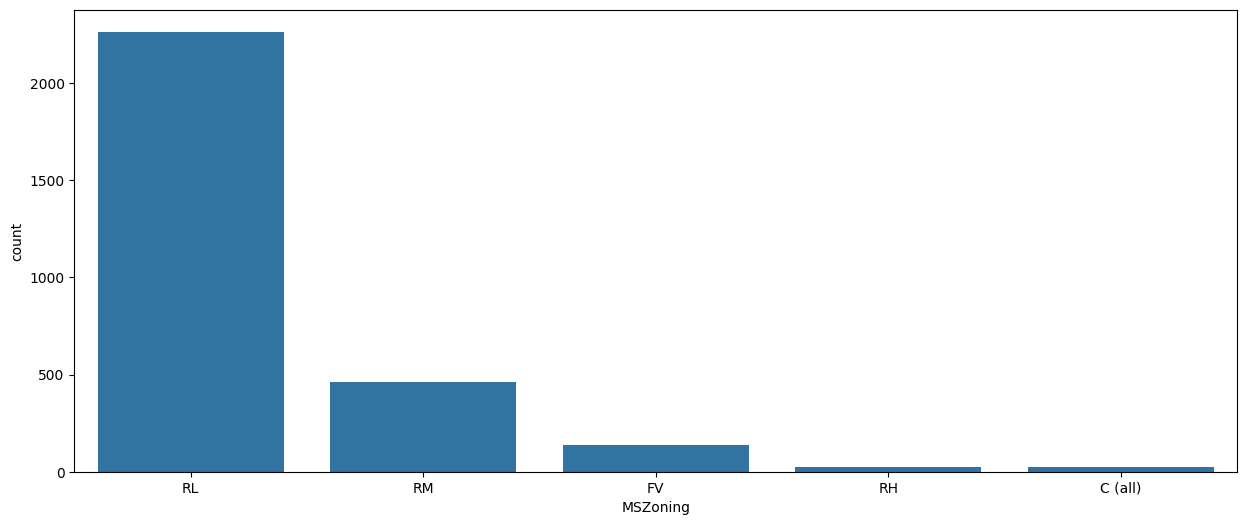

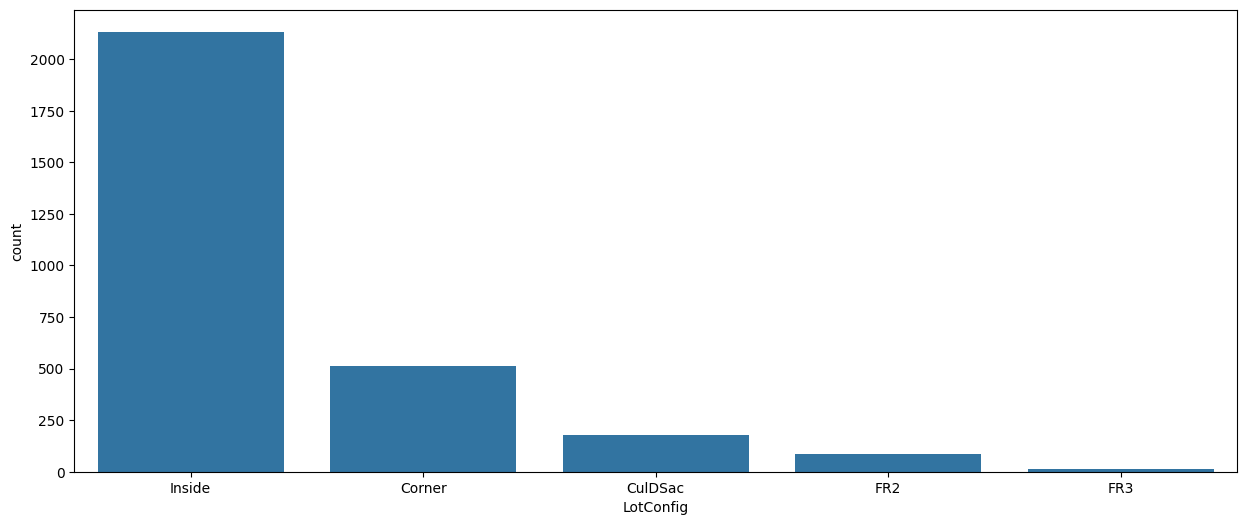

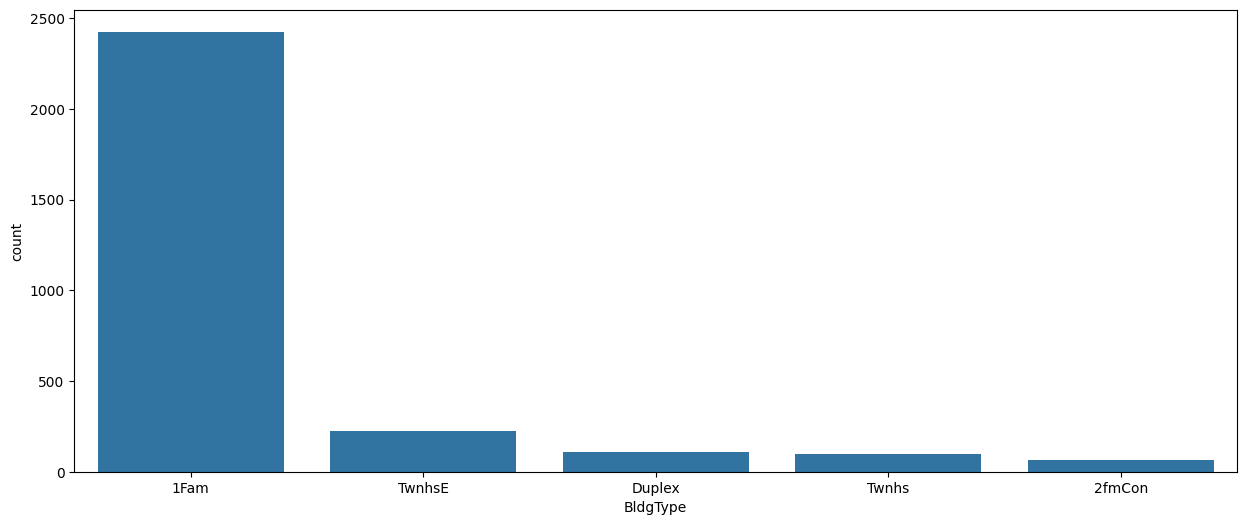

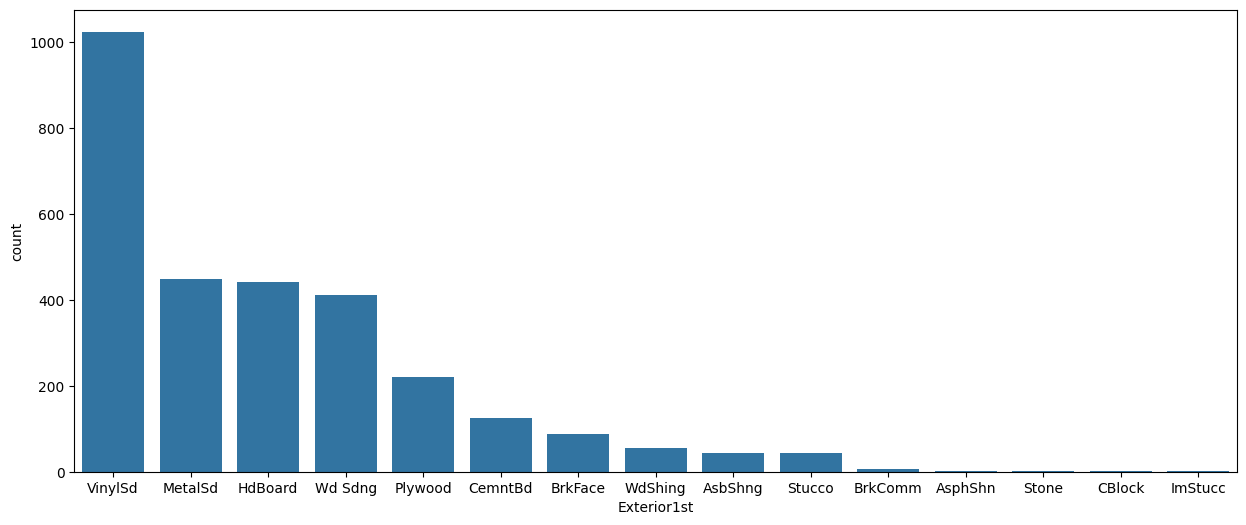

In [10]:
for i in df.columns:
    if df[i].dtype == "object":
        plt.figure(figsize=(15,6))
        sns.barplot(df[i].value_counts())

In [11]:
from plotly import express as ex

In [12]:
for i in df.columns:
    if df[i].dtype == "object":
        # plt.figure(figsize=(15,6))
        fig = ex.bar(df[i].value_counts(),text_auto=True)
        fig.show()

Data Cleaning ---

In [13]:
# Remove irrelevent cols

df.drop('Id',axis=1,inplace=True)
df.shape

(2919, 12)

In [14]:
# Look for missing values

df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [15]:
# let create a data set where there is na in target values
df_test = df[df['SalePrice'].isnull()]
df_test.shape

(1459, 12)

In [16]:
# df_test.to_csv('../data/housepricetest.csv')

In [17]:
# as there are less count of missing value from all the col we will remove the missing or NA

df.dropna(how='any',inplace=True)
df.shape

(1460, 12)

One Hot encodeing --

In [18]:
df_dummy = pd.get_dummies(df,dtype='int')
df_dummy

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
df_encod = encoder.fit_transform(df[obj])
df_encod = pd.DataFrame(df_encod,columns=encoder.get_feature_names_out())
df_encod

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for i in df.columns:
    if df[i].dtype == 'object':
        enco = encoder.fit_transform(df[[i]])
df1 = pd.DataFrame(enco,columns=encoder.get_feature_names_out())
df1

,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_ohe = df.drop(obj,axis=1)
df_ohe

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0


In [22]:
df_new = pd.concat([df_ohe,df_encod],axis=1)
df_new

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
x = df_new.drop('SalePrice',axis=1)
y = df_new['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 37), (292, 37), (1168,), (292,))

In [27]:
# SVM

model_svm = SVR()
model_svm.fit(x_train,y_train)
y_pre = model_svm.predict(x_test)

print('MAPE' , mean_absolute_percentage_error(y_test,y_pre))
# print('accuracy', accuracy_score(y_test,y_pre))

MAPE 0.35966348625875183


In [28]:
# RF-R

model_rfr = RandomForestRegressor(n_estimators=10,oob_score=True)
model_rfr.fit(x_train,y_train)
y_pre = model_rfr.predict(x_test)

print('MAPE' , mean_absolute_percentage_error(y_test,y_pre))
print(model_rfr.oob_score_)

MAPE 0.14433448070045105
0.5551616343753971


/Users/mohitrajnayak/Data Sci Work/Data Sci REPO/Machine-Learning/venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:612: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



In [29]:
# LR

model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pre = model_lr.predict(x_test)

print('MAPE' , mean_absolute_percentage_error(y_test,y_pre))

MAPE 0.1978288265202465
